# 1. | Importing Libraries

In [33]:
# --- Importing Libraries ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

from matplotlib.collections import PathCollection
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error
from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC, ConfusionMatrix
from yellowbrick.model_selection import LearningCurve

# 2. | Read Dataset

In [2]:
df = pd.read_csv("adm_data.csv",index_col=0)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.tail()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
396,324,110,3,3.5,3.5,9.04,1,0.82
397,325,107,3,3.0,3.5,9.11,1,0.84
398,330,116,4,5.0,4.5,9.45,1,0.91
399,312,103,3,3.5,4.0,8.78,0,0.67
400,333,117,4,5.0,4.0,9.66,1,0.95


In [4]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 28.1 KB


In [6]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [7]:
data = []
rate = df["Chance of Admit"].values
for x in rate:
  if (x >= 0.1 and x < 0.60):    
    data.append("low")
  elif (x >= 0.60 and x < 0.90):
    data.append("medium")
  elif (x >= 0.90 and x < 1.00):
    data.append("high")

In [8]:
df['category'] = data
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,category
Serial No.,,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92,high
2,324,107,4,4.0,4.5,8.87,1,0.76,medium
3,316,104,3,3.0,3.5,8.00,1,0.72,medium
4,322,110,3,3.5,2.5,8.67,1,0.80,medium
5,314,103,2,2.0,3.0,8.21,0,0.65,medium
...,...,...,...,...,...,...,...,...,...
396,324,110,3,3.5,3.5,9.04,1,0.82,medium
397,325,107,3,3.0,3.5,9.11,1,0.84,medium
398,330,116,4,5.0,4.5,9.45,1,0.91,high


# 3. | Data Exploration

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
corr = df.corr()

<AxesSubplot:>

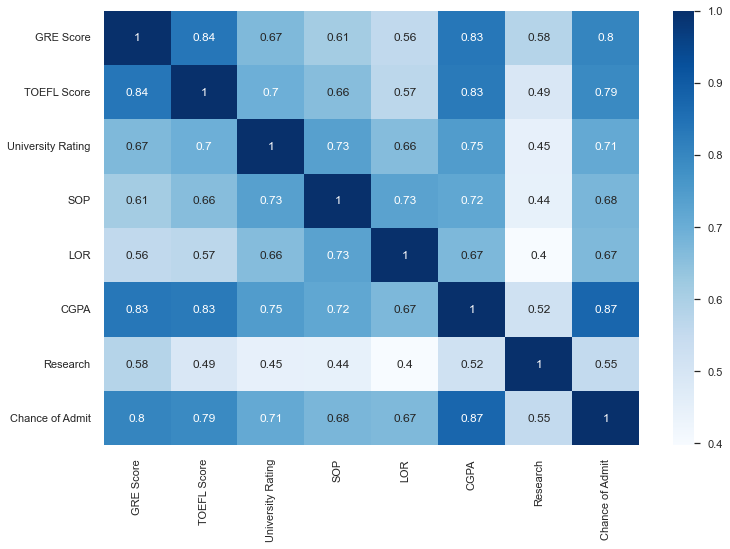

In [11]:
sns.set(rc={'figure.figsize':(12,8)})
sns.heatmap(corr, annot = True, cmap = 'Blues')

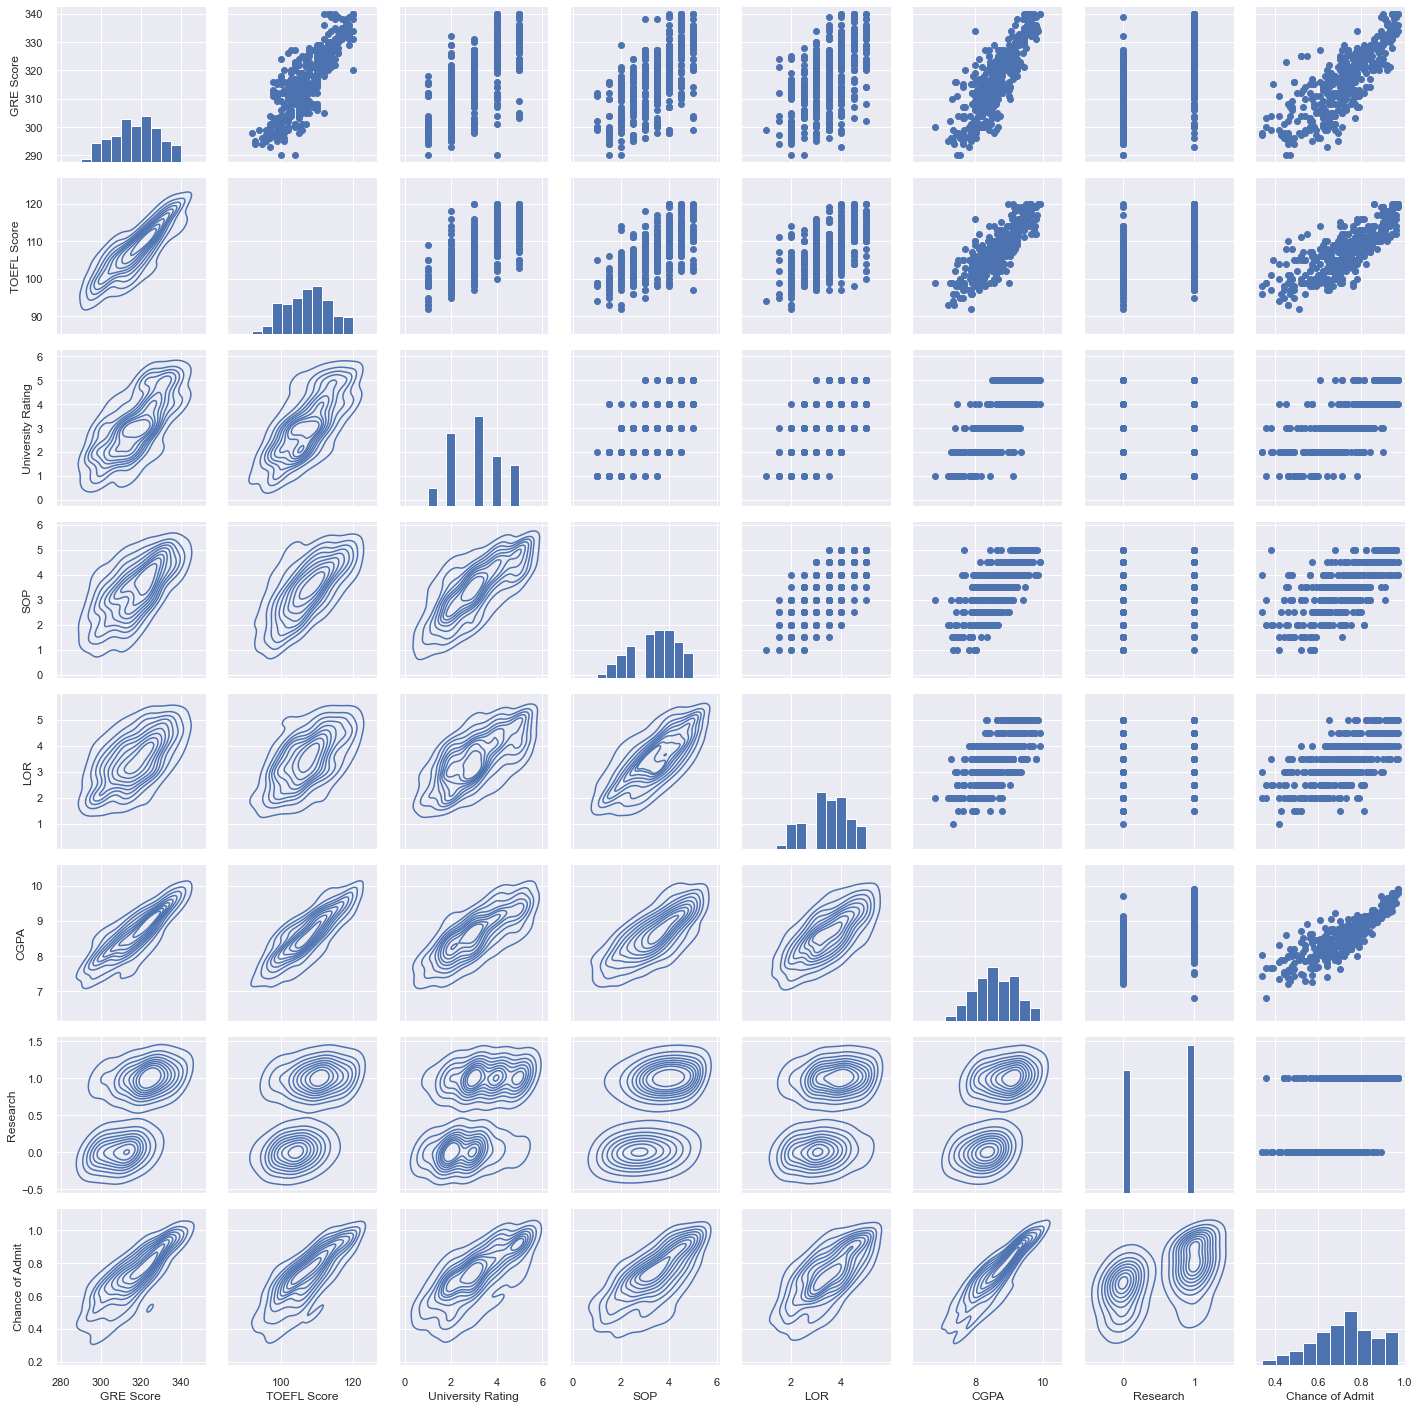

In [12]:
# Map to upper,lower and diagonal
plot = sns.PairGrid(df)
plot.map_diag(plt.hist)
plot.map_upper(plt.scatter)
plot.map_lower(sns.kdeplot)

*************************
.: Category Total :.
*************************


medium    270
low        73
high       57
Name: category, dtype: int64

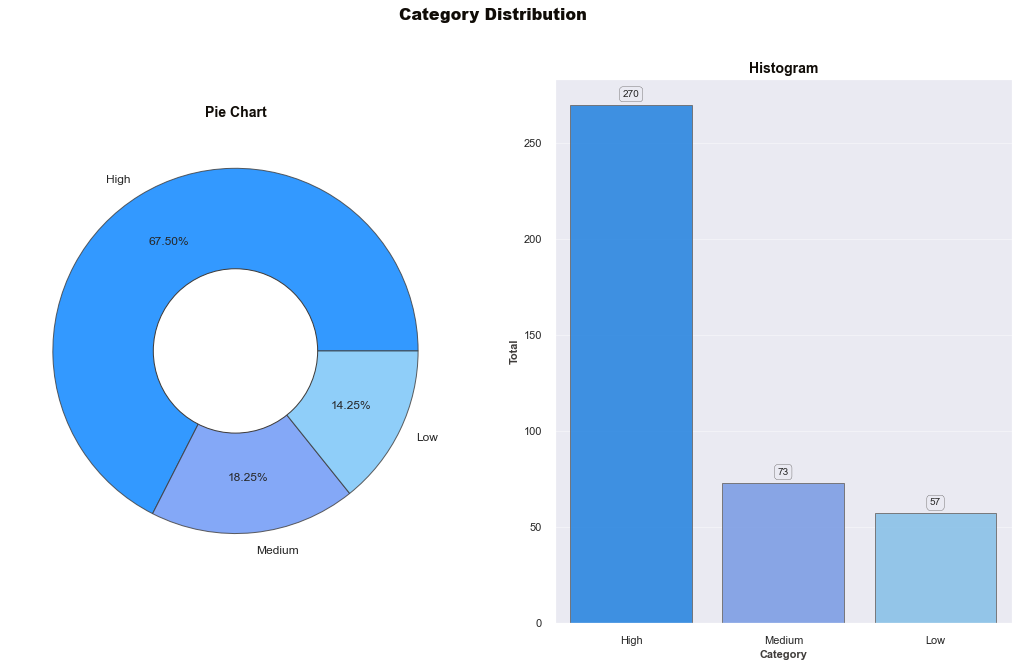

In [13]:
# --- Create List of Color Palletes ---
red_grad = ['#FF0000', '#BF0000', '#800000', '#400000', '#000000']
pink_grad = ['#8A0030', '#BA1141', '#FF5C8A', '#FF99B9', '#FFDEEB']
purple_grad = ['#4C0028', '#7F0043', '#8E004C', '#A80059', '#C10067']
color_mix = ['#F38BB2', '#FFB9CF', '#FFD7D7', '#F17881', '#E7525B']
black_grad = ['#100C07', '#3E3B39', '#6D6A6A', '#9B9A9C', '#CAC9CD']
blue_grad = ['#0080FF', '#6593F5', '#73C2F8', '#66D7EB', '#111E6C']
# --- Setting Colors, Labels, Order ---
colors=blue_grad[0:3]
labels=['High', 'Medium', 'Low']
order=df['category'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(18, 10))
plt.suptitle('Category Distribution', fontweight='heavy', 
             fontsize='16', fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14,
          fontfamily='sans-serif', color=black_grad[0])
plt.pie(df['category'].value_counts(), labels=labels, colors=colors, pctdistance=0.7,
        autopct='%.2f%%', wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]),
        textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[0])
ax = sns.countplot(x='category', data=df, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10, 
             bbox=dict(facecolor='none', edgecolor=black_grad[0], 
                       linewidth=0.25, boxstyle='round'))

plt.xlabel('Category', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.xticks([0, 1, 2], labels)
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 25)
print('\033[1m'+'.: Category Total :.'+'\033[0m')
print('*' * 25)
df.category.value_counts(dropna=False)

.: GRE Score Column Skewness & Kurtosis :.
****************************************
Skewness: -0.063
Kurtosis: -0.700




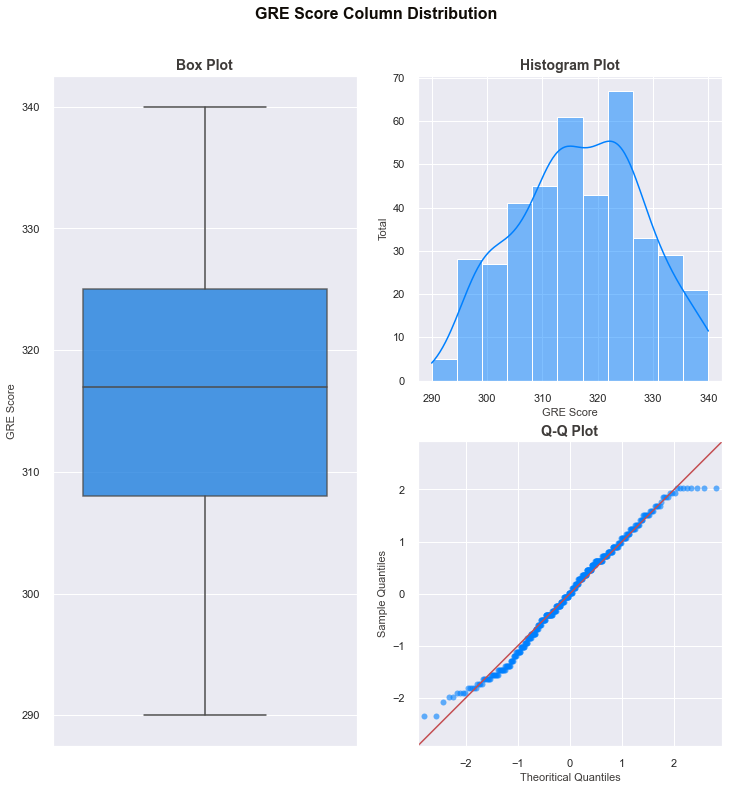

In [14]:
# --- Variable, Color & Plot Size ---
var = 'GRE Score'
color = '#0080FF'
fig=plt.figure(figsize=(12, 12))

# --- Skewness & Kurtosis ---
print('\033[1m'+'.: GRE Score Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 40)
print('Skewness:'+'\033[1m {:.3f}'.format(df[var].skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(df[var].kurt(axis = 0, skipna = True)))
print('\n')

# --- General Title ---
fig.suptitle('GRE Score Column Distribution', fontweight='bold', fontsize=16, 
             fontfamily='sans-serif', color=black_grad[0])
fig.subplots_adjust(top=0.9)

# --- Histogram ---
ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
sns.histplot(data=df, x=var, kde=True, color=color)
plt.xlabel('GRE Score', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Total', fontweight='regular', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])

# --- Q-Q Plot ---
ax_2=fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
qqplot(df[var], fit=True, line='45', ax=ax_2, markerfacecolor=color, 
       markeredgecolor=color, alpha=0.6)
plt.xlabel('Theoritical Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Sample Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])

# --- Box Plot ---
ax_3=fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[1])
sns.boxplot(data=df, y=var, color=color, boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('GRE Score', fontweight='regular', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])

plt.show()

.: TOEFL Score Column Skewness & Kurtosis :.
****************************************
Skewness: 0.057
Kurtosis: -0.579




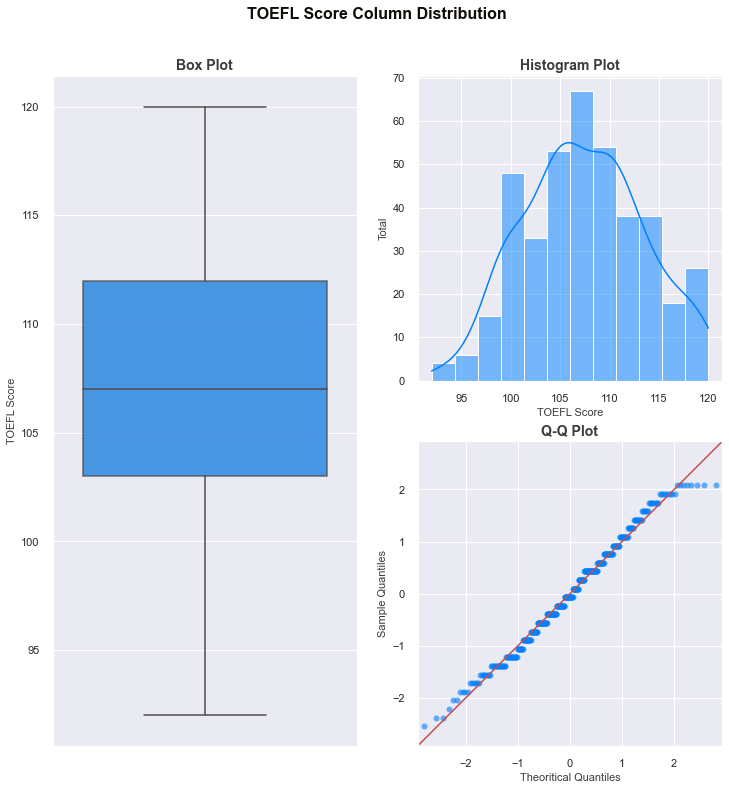

In [15]:
# --- Variable, Color & Plot Size ---
var = 'TOEFL Score'
color = '#0080FF'
fig=plt.figure(figsize=(12, 12))

# --- Skewness & Kurtosis ---
print('\033[1m'+'.: TOEFL Score Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 40)
print('Skewness:'+'\033[1m {:.3f}'.format(df[var].skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(df[var].kurt(axis = 0, skipna = True)))
print('\n')

# --- General Title ---
fig.suptitle('TOEFL Score Column Distribution', fontweight='bold', fontsize=16, 
             fontfamily='sans-serif', color=black_grad[0])
fig.subplots_adjust(top=0.9)

# --- Histogram ---
ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
sns.histplot(data=df, x=var, kde=True, color=color)
plt.xlabel('TOEFL Score', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Total', fontweight='regular', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])

# --- Q-Q Plot ---
ax_2=fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
qqplot(df[var], fit=True, line='45', ax=ax_2, markerfacecolor=color, 
       markeredgecolor=color, alpha=0.6)
plt.xlabel('Theoritical Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Sample Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])

# --- Box Plot ---
ax_3=fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[1])
sns.boxplot(data=df, y=var, color=color, boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('TOEFL Score', fontweight='regular', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])

plt.show()

# 4. | Preprocessing Data

In [16]:
df['category'].replace(['high', 'medium', 'low'],
                        [3, 2, 1], inplace=True)
df['category'] = df['category'].astype("int")
df['category']

Serial No.
1      3
2      2
3      2
4      2
5      2
      ..
396    2
397    2
398    3
399    2
400    3
Name: category, Length: 400, dtype: int32

In [17]:
df.corr(method='pearson')

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,category
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610,0.695490
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594,0.698051
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250,0.624995
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732,0.615959
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889,0.591504
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289,0.765541
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202,0.448322
Chance of Admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000,0.866984
category,0.695490,0.698051,0.624995,0.615959,0.591504,0.765541,0.448322,0.866984,1.000000


In [18]:
x = df.drop(columns=['category','Chance of Admit'])
y = df['category']

In [19]:
x_reg = df.drop(columns=['Chance of Admit'])
y_reg = df['Chance of Admit']

In [20]:
x_reg = MinMaxScaler().fit_transform(x_reg)

In [21]:
x = MinMaxScaler().fit_transform(x)

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [23]:
xre_train, xre_test, yre_train, yre_test = train_test_split(x_reg, y_reg, test_size=0.2, random_state=0)

# 5. | Modelling

# KNN

In [24]:
# --- Applying KNN ---
KNNClassifier = KNeighborsClassifier(n_neighbors=5)
KNNClassifier.fit(x_train, y_train)

y_pred_KNN = KNNClassifier.predict(x_test)

.:. K-Nearest Neighbour Accuracy: 81.25% .:.

.: Classification Report
******************************
              precision    recall  f1-score   support

           1       0.70      0.50      0.58        14
           2       0.85      0.90      0.87        58
           3       0.67      0.75      0.71         8

    accuracy                           0.81        80
   macro avg       0.74      0.72      0.72        80
weighted avg       0.81      0.81      0.81        80


.: Performance Evaluation
******************************


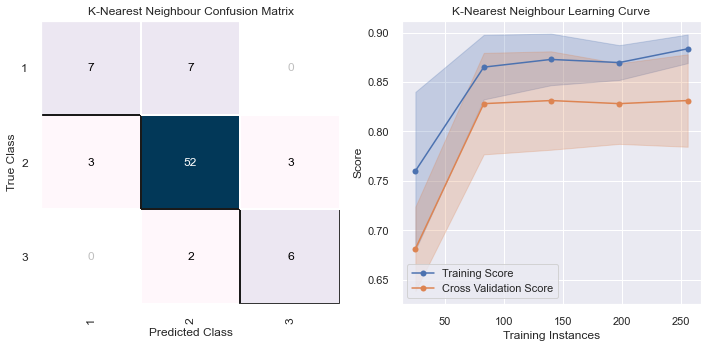

In [25]:
# --- KNN Accuracy ---
KNNAcc = accuracy_score(y_pred_KNN, y_test)
print('.:. K-Nearest Neighbour Accuracy:'+'\033[1m {:.2f}%'.format(KNNAcc*100)+' .:.')

# --- KNN Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 30)
print(classification_report(y_test, y_pred_KNN))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 30)
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(10, 5))

# --- KNN Confusion Matrix ---
knnmatrix = ConfusionMatrix(KNNClassifier, ax=ax1, cmap='PuBu',
                            title='K-Nearest Neighbour Confusion Matrix')
knnmatrix.fit(x_train, y_train)
knnmatrix.score(x_test, y_test)
knnmatrix.finalize()

# --- KNN Learning Curve ---
knnlc = LearningCurve(KNNClassifier, ax=ax2, title='K-Nearest Neighbour Learning Curve')
knnlc.fit(x_train, y_train)
knnlc.finalize()

plt.tight_layout();

In [26]:
# **Mencari nilai K terbaik berdasarkan nilai error rate terendah untuk dimasukkan kedalam model KNN**
err_rates = []
for idx in range(1,31):
 knn = KNeighborsClassifier(n_neighbors = idx)
 knn.fit(x_train, y_train)
 pred_idx = knn.predict(x_test)
 err_rates.append(np.mean(y_test != pred_idx))

Text(0.5, 1.0, 'Error Rate vs K-value')

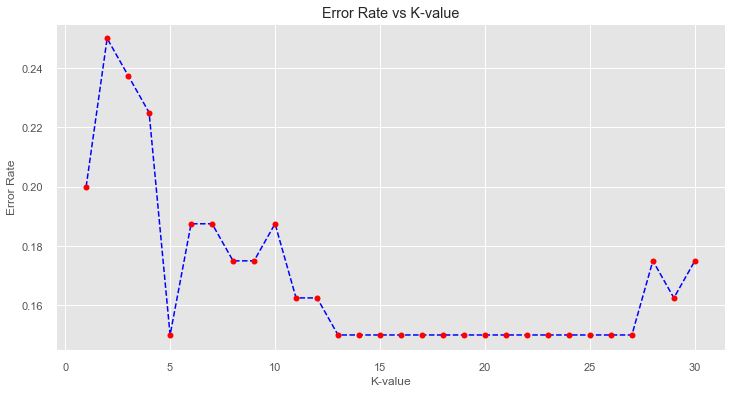

In [27]:
plt.style.use('ggplot')
plt.subplots(figsize = (12,6))
plt.plot(range(1,31), err_rates, linestyle = 'dashed', color = 'blue', marker = 'o', markerfacecolor = 'red')
plt.xlabel('K-value')
plt.ylabel('Error Rate')
plt.title('Error Rate vs K-value')

In [28]:
RFclassifier = RandomForestClassifier(n_estimators=1120, random_state=7, max_leaf_nodes=35, min_samples_split=20)

RFclassifier.fit(x_train, y_train)
y_pred_RF = RFclassifier.predict(x_test)

.:. Random Forest Accuracy: 87.50% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           1       0.80      0.57      0.67        14
           2       0.89      0.95      0.92        58
           3       0.88      0.88      0.88         8

    accuracy                           0.88        80
   macro avg       0.85      0.80      0.82        80
weighted avg       0.87      0.88      0.87        80


.: Performance Evaluation
**************************


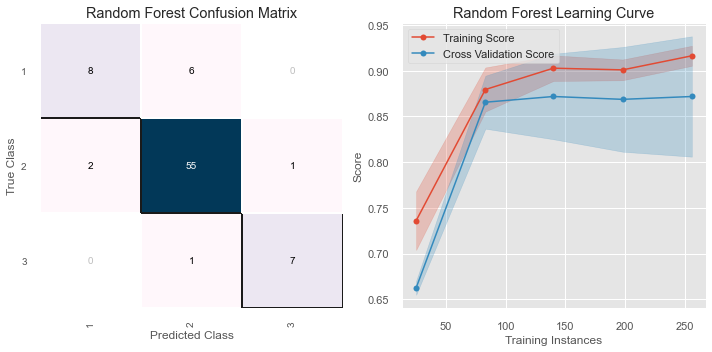

In [29]:
# --- Random Forest Accuracy ---
RFAcc = accuracy_score(y_pred_RF, y_test)
print('.:. Random Forest Accuracy:'+'\033[1m {:.2f}%'.format(RFAcc*100)+' .:.')

# --- Random FOrest Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_RF))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(10, 5))

# --- Random Forest Confusion Matrix ---
rfcmatrix = ConfusionMatrix(RFclassifier, ax=ax1, cmap='PuBu',
                            title='Random Forest Confusion Matrix')
rfcmatrix.fit(x_train, y_train)
rfcmatrix.score(x_test, y_test)
rfcmatrix.finalize()

# --- Random Forest Learning Curve ---
rcclc = LearningCurve(RFclassifier, ax=ax2, title='Random Forest Learning Curve')
rcclc.fit(x_train, y_train)
rcclc.finalize()

plt.tight_layout();

# Regresi

In [30]:
# Fitting Multiple Linear Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() 
regressor.fit(xre_train, yre_train)

LinearRegression()

In [31]:
# Predicting the results
y_predict = regressor.predict(xre_test)

In [34]:
mean_squared_error(yre_test, y_predict)

0.0031197245777292784

In [35]:
from sklearn.metrics import r2_score
r2 = r2_score(yre_test,y_predict)
r2 = '{:.4}'.format(r2*100)
print(f'{r2}%')

82.83%


In [36]:
from sklearn.ensemble import AdaBoostRegressor
regr = AdaBoostRegressor(n_estimators=1120, random_state=0)
regr.fit(xre_train, yre_train)

AdaBoostRegressor(n_estimators=1120, random_state=0)

In [37]:
ypredict = regr.predict(xre_test)

In [38]:
mean_squared_error(yre_test, ypredict)

0.0035285881927539626

In [39]:
r22 = r2_score(yre_test,ypredict)
r22 = '{:.4}'.format(r22*100)
print(f'{r22}%')

80.58%


In [40]:
from sklearn.ensemble import GradientBoostingRegressor

In [41]:
from sklearn.metrics import mean_squared_error
est = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0, loss='squared_error')
est.fit(xre_train, yre_train)

GradientBoostingRegressor(max_depth=1, random_state=0)

In [42]:
ypredict2 = est.predict(xre_test)

In [43]:
mean_squared_error(yre_test, ypredict2)

0.00266975575575126

In [44]:
r23 = r2_score(yre_test,ypredict2)
r23 = '{:.4}'.format(r23*100)
print(f'{r23}%')

85.3%
